<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
# !pip install pandas

In [ ]:
# !pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [ ]:
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

### Step 2: Import necessary libraries and load the dataset


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [118]:
df = pd.read_csv("survey_data_1.csv")

### Display the first few rows of the data to understand its structure


In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [14]:
##Write your code here
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

In [15]:
data_plot1 = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

Text(0.5, 1.0, 'Job satisfaction scores across various age groups')

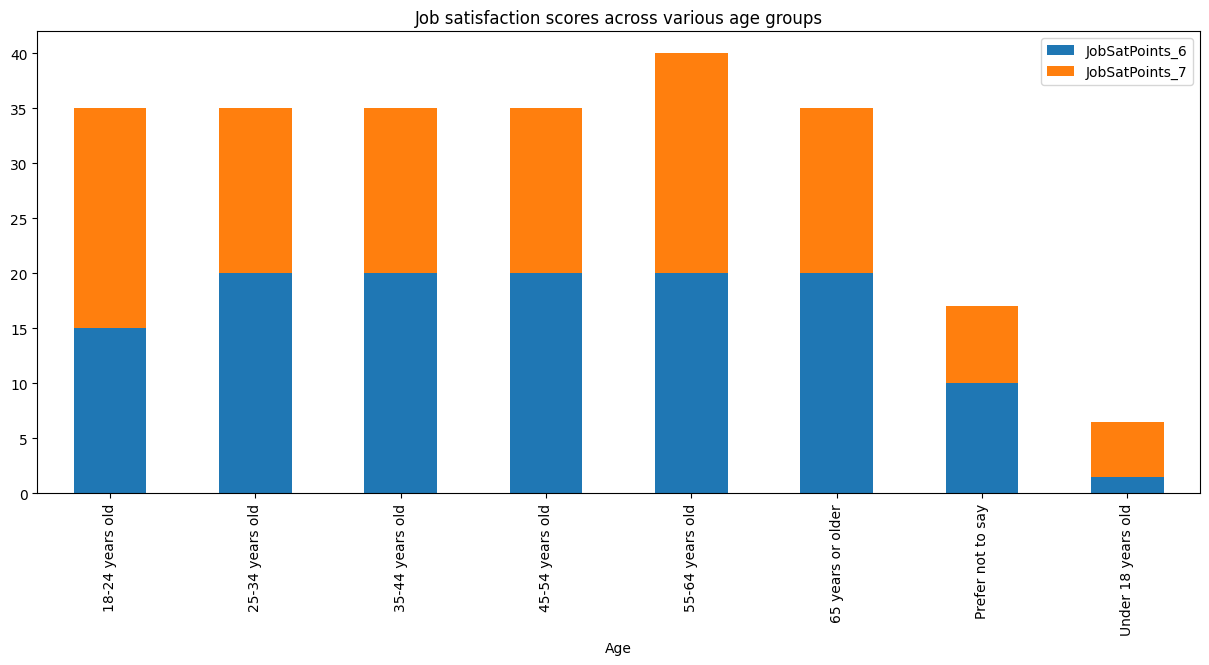

In [16]:
fig, ax  = plt.subplots(figsize=(15,6))
data_plot1.plot(kind='bar', stacked = True, ax=ax)
plt.title('Job satisfaction scores across various age groups')

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


Text(0.5, 1.0, 'Job satisfaction scores across various Employment Status')

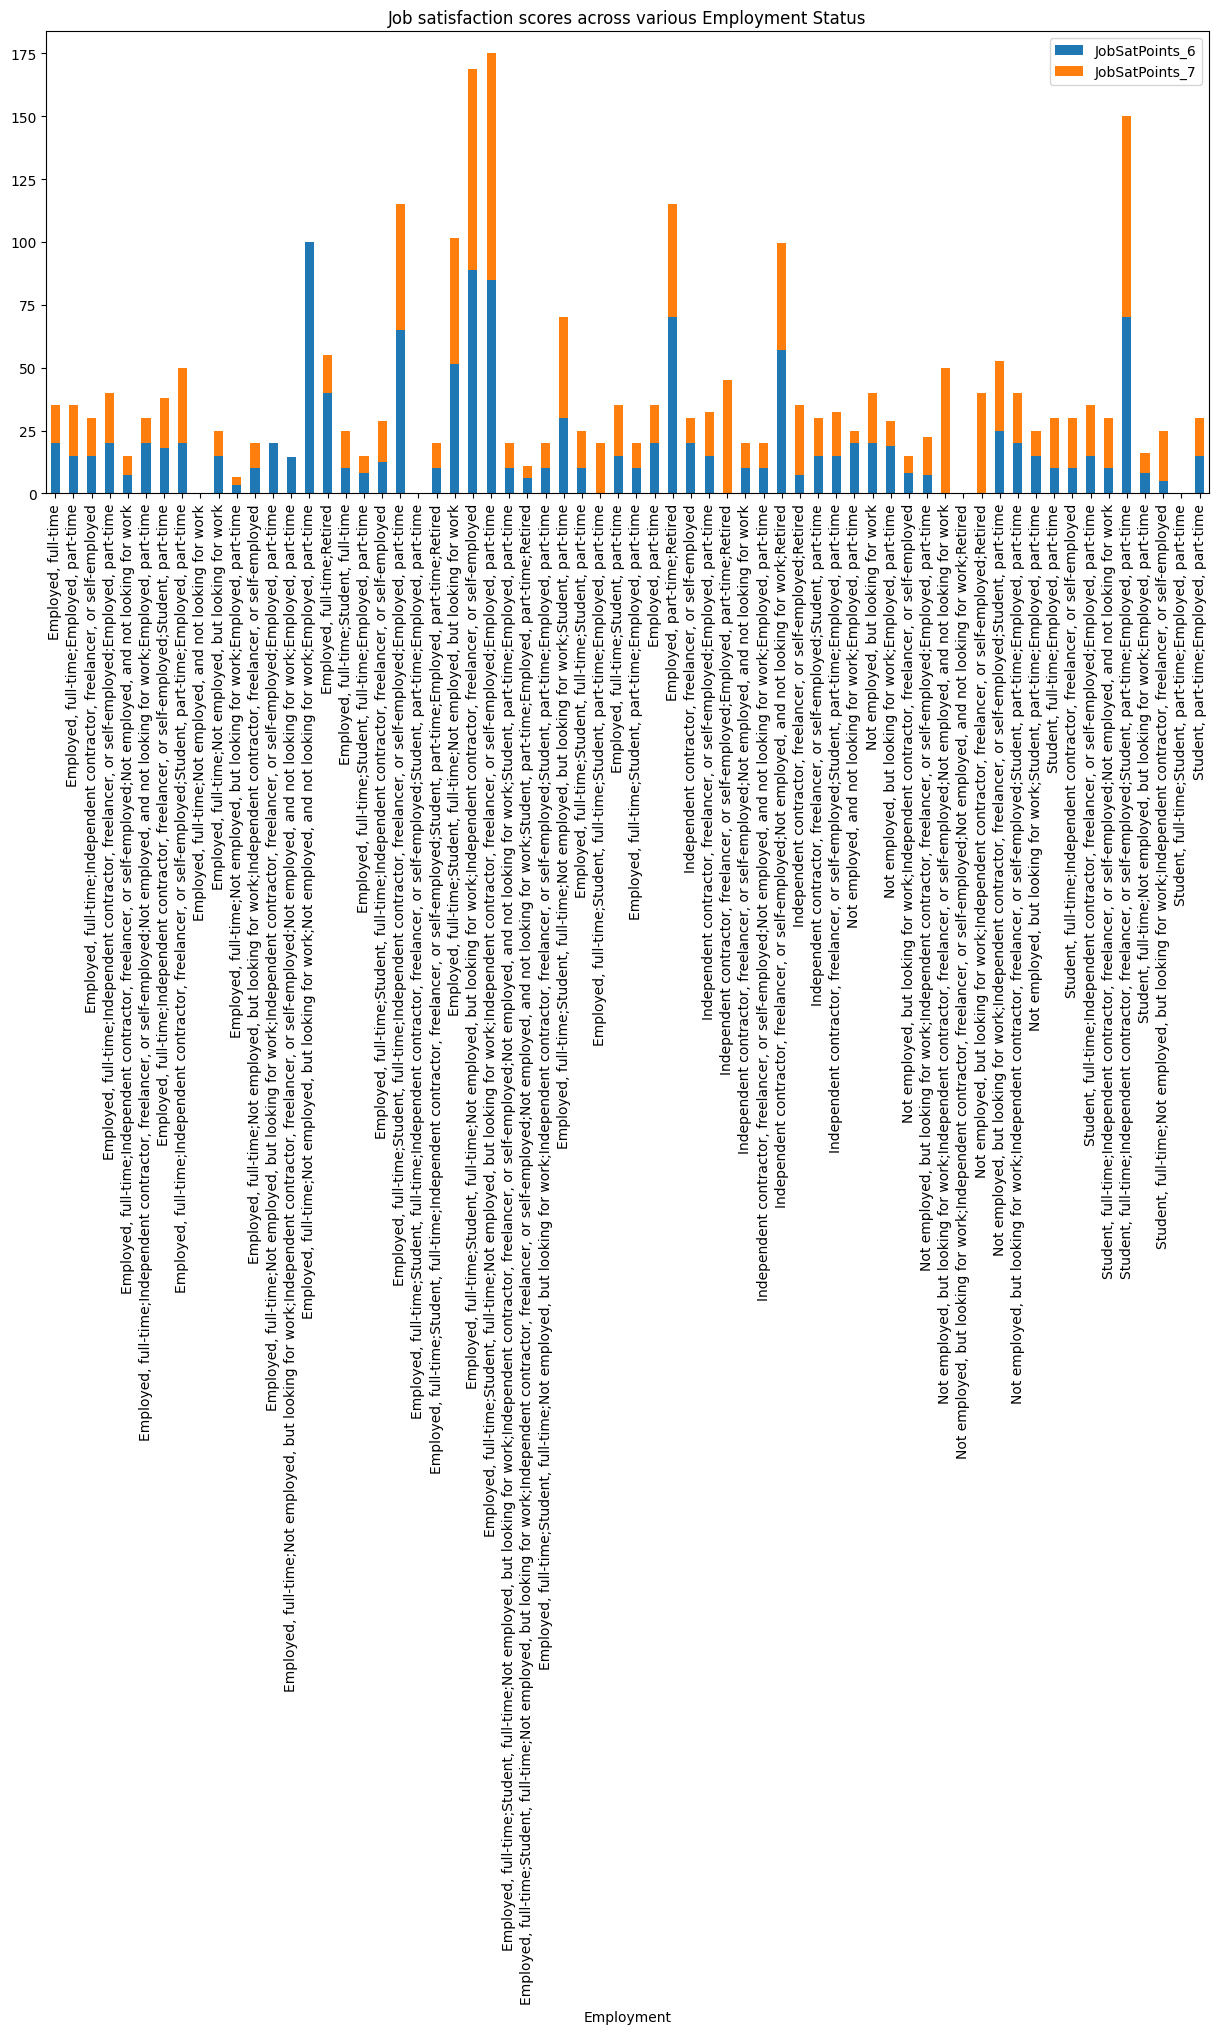

In [17]:
##Write your code here
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

data_plot2 = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

fig, ax  = plt.subplots(figsize=(15,6))
data_plot2.plot(kind='bar', stacked = True, ax=ax)
plt.title('Job satisfaction scores across various Employment Status')

In [119]:

df = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

df['Employment'] = df['Employment'].str.split(';')
df_exploded = df.explode('Employment')
df_exploded['Employment'] = df_exploded['Employment'].str.strip()

df_exploded['Employment'].unique()

array(['Employed, full-time', 'Student, part-time',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time', 'Employed, part-time',
       'Not employed, but looking for work', 'Retired',
       'Not employed, and not looking for work'], dtype=object)

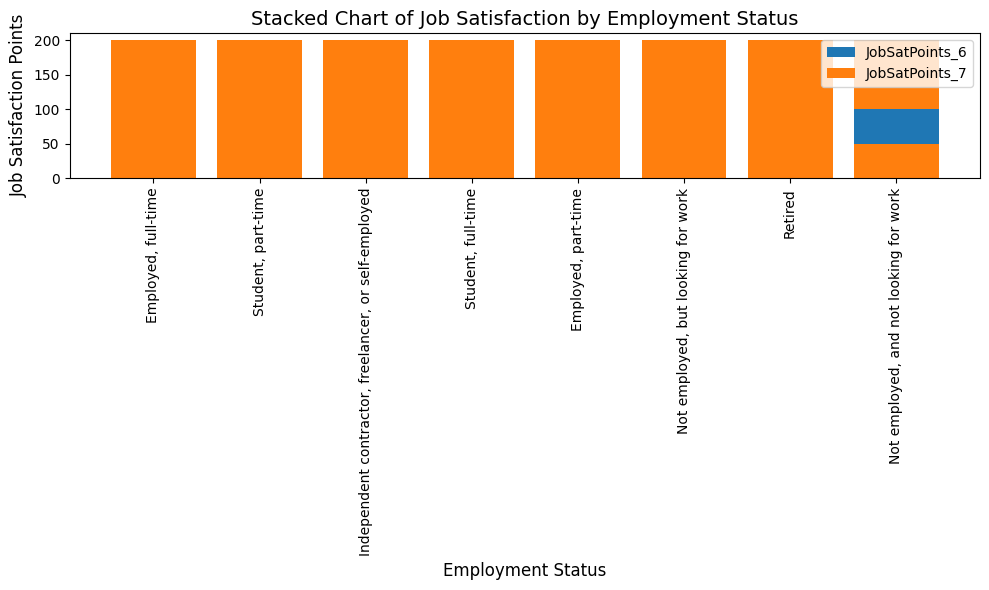

In [120]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plot stacked bar chart
bar1 = plt.bar(df_exploded['Employment'], df_exploded['JobSatPoints_6'], label='JobSatPoints_6')
bar2 = plt.bar(df_exploded['Employment'], df_exploded['JobSatPoints_7'], bottom=df_exploded['JobSatPoints_6'], label='JobSatPoints_7')

# Add labels and title
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.title('Stacked Chart of Job Satisfaction by Employment Status', fontsize=14)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [44]:
##Write your code here
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

In [45]:
data_plot3 = df_clean[(df_clean['Age'] == '25-34 years old' )]

In [47]:
# Bin compensation into categories for better visualization
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, float('inf')]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '>300k']
data_plot3['CompCategory'] = pd.cut(data_plot3['ConvertedCompYearly'], bins=bins, labels=labels)

# Example: binning JobSatPoints_6
bins = range(0, 101, 20)  # ➜ [0, 20, 40, 60, 80, 100]
labels = ['0–19', '20–39', '40–59', '60–79', '80–99']  # 5 labels for 6 edges

data_plot3['JobSatBin'] = pd.cut(data_plot3['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

comp_order = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '>300k']
data_plot3['CompCategory'] = pd.Categorical(data_plot3['CompCategory'], categories=comp_order, ordered=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_8400\2710110532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plot3['CompCategory'] = pd.cut(data_plot3['ConvertedCompYearly'], bins=bins, labels=labels)
C:\Users\HP\AppData\Local\Temp\ipykernel_8400\2710110532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plot3['JobSatBin'] = pd.cut(data_plot3['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8400\2710110532.py:13: SettingWithCopyWarning

C:\Users\HP\AppData\Local\Temp\ipykernel_8400\1136633774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_plot3 = data_plot3.groupby(['CompCategory', 'JobSatBin']).size().unstack(fill_value=0)


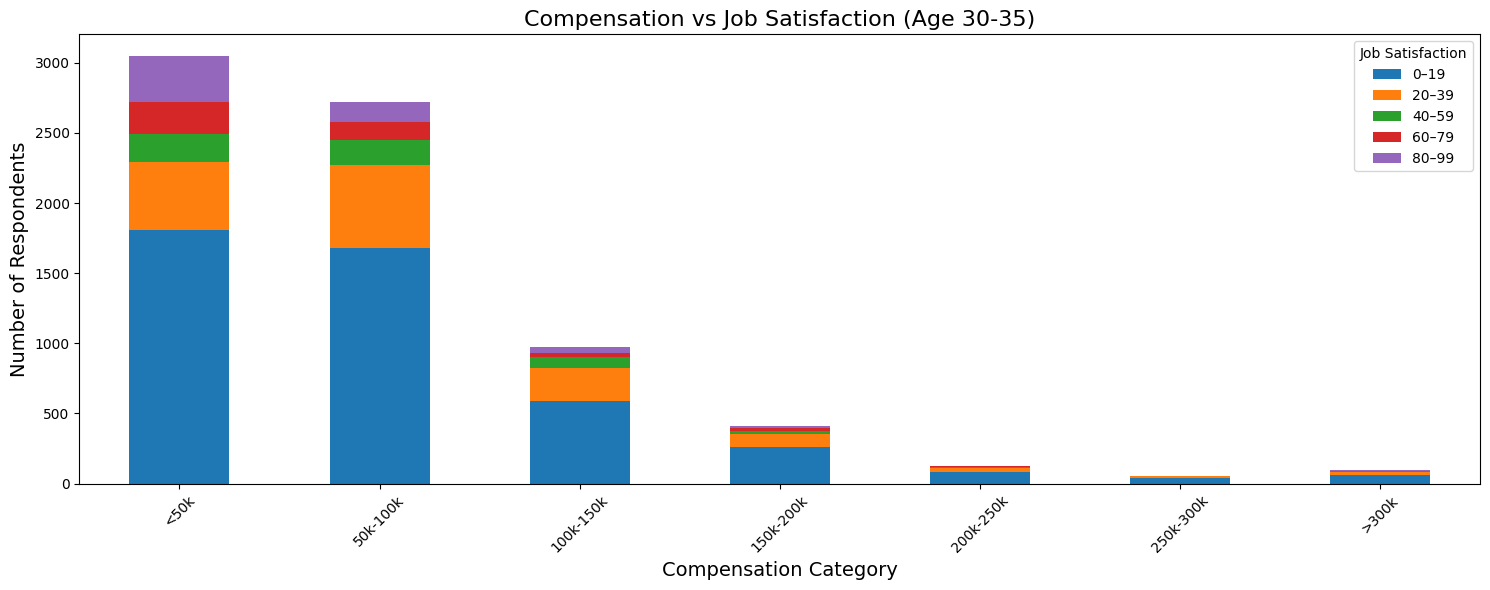

In [48]:
data_plot3 = data_plot3.groupby(['CompCategory', 'JobSatBin']).size().unstack(fill_value=0)

fig, ax  = plt.subplots(figsize=(15,6))
data_plot3.plot(kind='bar', stacked = True, ax=ax)
plt.title('Compensation vs Job Satisfaction (Age 30-35)', fontsize=16)
plt.xlabel('Compensation Category', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction')
plt.tight_layout()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [59]:
##Write your code here
data_plot4 = df.dropna(subset=['ConvertedCompYearly', 'Age', 'JobSat'])

In [66]:
# Group by AgeGroup and calculate median compensation and job satisfaction
grouped = data_plot4.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSat': 'median'
}).reset_index()
grouped

,Age,ConvertedCompYearly,JobSat
0,18-24 years old,25443.0,7.0
1,25-34 years old,60000.0,7.0
2,35-44 years old,85905.5,7.0
3,45-54 years old,101770.0,8.0
4,55-64 years old,118263.0,8.0
5,65 years or older,121668.0,8.0
6,Prefer not to say,133023.5,8.5
7,Under 18 years old,8661.0,8.0


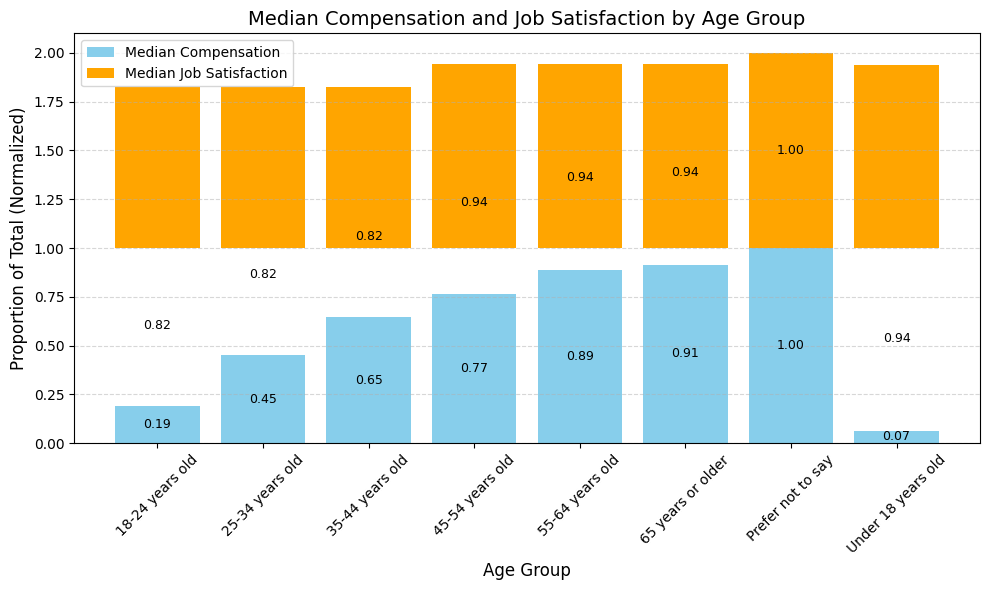

In [72]:
# # Normalize values for stacking
# grouped['Total'] = grouped['ConvertedCompYearly'] + grouped['JobSat']
# grouped['Compensation_pct'] = grouped['ConvertedCompYearly'] / grouped['Total']
# grouped['JobSatisfaction_pct'] = grouped['JobSat'] / grouped['Total']

# Normalize independently
grouped['Compensation_norm'] = grouped['ConvertedCompYearly'] / grouped['ConvertedCompYearly'].max()
grouped['JobSatisfaction_norm'] = grouped['JobSat'] / grouped['JobSat'].max()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(grouped['Age'], grouped['Compensation_norm'], label='Median Compensation', color='skyblue')
ax.bar(grouped['Age'], grouped['JobSatisfaction_norm'], bottom=grouped['Compensation_pct'], label='Median Job Satisfaction', color='orange')

# Customize plot
ax.set_title('Median Compensation and Job Satisfaction by Age Group', fontsize=14)
ax.set_ylabel('Proportion of Total (Normalized)', fontsize=12)
ax.set_xlabel('Age Group', fontsize=12)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

for i, age in enumerate(grouped['Age']):
    comp = grouped.loc[i, 'Compensation_norm']
    job = grouped.loc[i, 'JobSatisfaction_norm']
    ax.text(i, comp / 2, f"{comp:.2f}", ha='center', va='center', fontsize=9, color='black')
    ax.text(i, comp + job / 2, f"{job:.2f}", ha='center', va='center', fontsize=9, color='black')

ax.yaxis.grid(True, linestyle='--', alpha=0.5)


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [86]:
df['DatabaseWantToWorkWith'].unique()

array([nan, 'PostgreSQL', 'Firebase Realtime Database', ...,
       'Cassandra;Firebase Realtime Database;MariaDB;Microsoft Access;MongoDB;MySQL;PostgreSQL;Redis',
       'MySQL;Presto;TiDB',
       'BigQuery;Cassandra;Databricks SQL;DuckDB;Elasticsearch;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis;Snowflake;SQLite;Supabase'],
      shape=(8479,), dtype=object)

In [87]:
##Write your code here
data_plot5 = df.dropna(subset=['DatabaseWantToWorkWith', 'Age'])

In [ ]:
# Drop NaNs and split roles
data_plot5['DatabaseWantToWorkWith'] = data_plot5['DatabaseWantToWorkWith'].str.split(';')
data_plot5_exploded = data_plot5.explode('DatabaseWantToWorkWith')
data_plot5_exploded['DatabaseWantToWorkWith'].unique()

In [93]:
top5 = data_plot5_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5).index.tolist()
df_top5 = data_plot5_exploded[data_plot5_exploded['DatabaseWantToWorkWith'].isin(top5)]


In [94]:
db_counts = df_top5.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')
total_per_age = df_top5.groupby('Age').size().reset_index(name='Total')
merged = pd.merge(db_counts, total_per_age, on='Age')
merged['Proportion'] = merged['Count'] / merged['Total']



In [95]:
pivot_df = merged.pivot(index='Age', columns='DatabaseWantToWorkWith', values='Proportion').fillna(0)

# Optional: reorder age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
pivot_df = pivot_df.reindex(age_order)


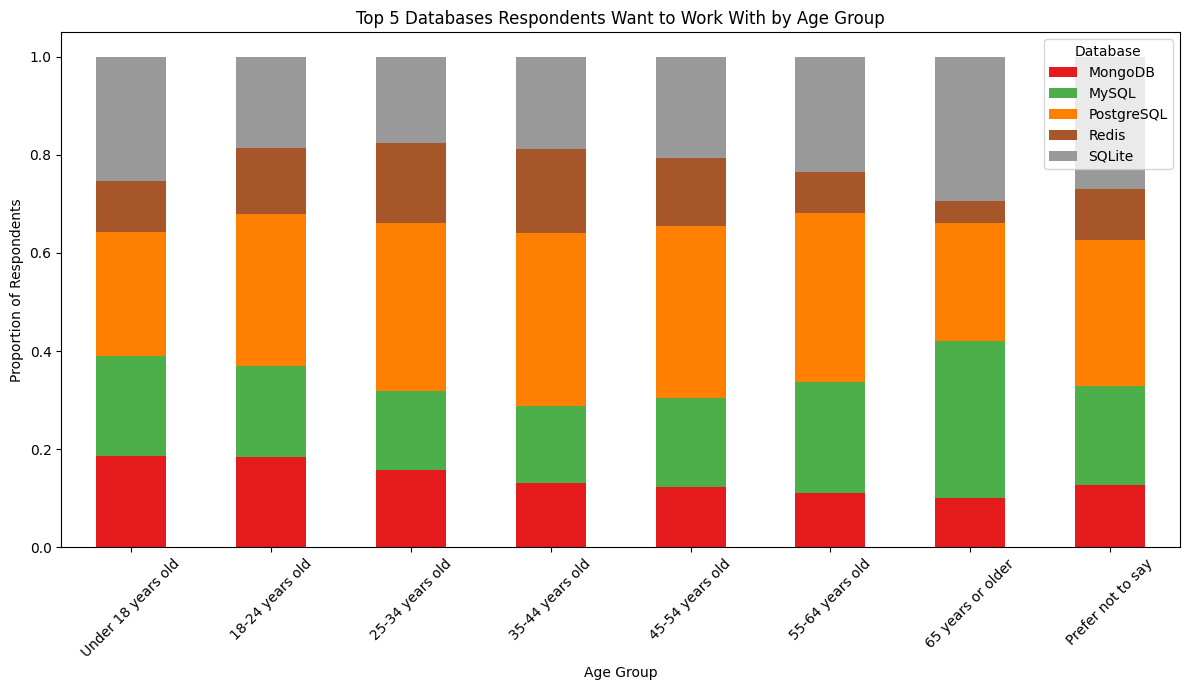

In [102]:
# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set1')
plt.title('Top 5 Databases Respondents Want to Work With by Age Group')
plt.ylabel('Proportion of Respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Database')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [103]:
##Write your code here
df = df.dropna(subset=['Employment', 'JobSat'])
df['Employment'] = df['Employment'].astype(str).str.split(';')
df_exploded = df.explode('Employment')
df_exploded['Employment'] = df_exploded['Employment'].str.strip()

C:\Users\HP\AppData\Local\Temp\ipykernel_8400\1518369254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Employment'] = df['Employment'].astype(str).str.split(';')


In [104]:
df_exploded['Employment'].value_counts()

Employment
Employed, full-time                                     26231
Independent contractor, freelancer, or self-employed     4275
Employed, part-time                                      1808
Student, full-time                                       1021
Student, part-time                                        943
Not employed, but looking for work                        141
Retired                                                    23
Not employed, and not looking for work                     23
Name: count, dtype: int64

In [105]:
crosstab = pd.crosstab(df_exploded['JobSat'], df_exploded['Employment'])

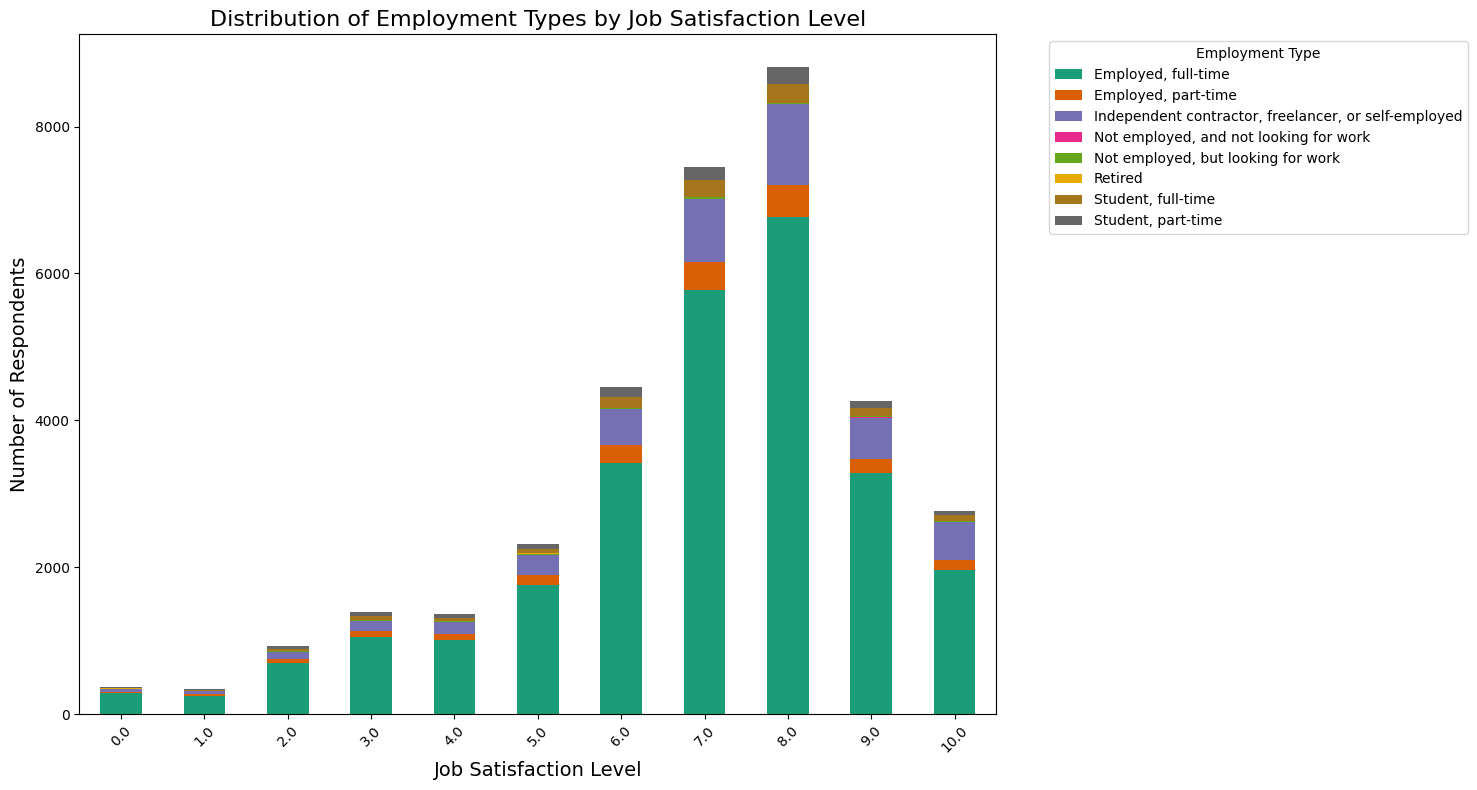

In [106]:
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))
crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Dark2')
plt.title('Distribution of Employment Types by Job Satisfaction Level', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [107]:
##Write your code here
df['LanguageAdmired'].unique()

array(['JavaScript;Python;Ruby', 'Bash/Shell (all shells);JavaScript;VBA',
       'C#;SQL', ...,
       'Bash/Shell (all shells);Dart;Go;HTML/CSS;JavaScript;Python',
       'JavaScript;Kotlin;Python',
       'Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;PHP;SQL;TypeScript'],
      shape=(7117,), dtype=object)

In [108]:
df = df.dropna(subset=['LanguageAdmired', 'Age'])

df['LanguageAdmired']= df['LanguageAdmired'].str.split(';')
df_exploded = df.explode('LanguageAdmired')
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip()

df_exploded['LanguageAdmired'].value_counts()

LanguageAdmired
SQL                        11305
JavaScript                 11016
HTML/CSS                    9892
Python                      9891
TypeScript                  8976
Bash/Shell (all shells)     6748
C#                          5855
Java                        4348
C++                         3138
Go                          3076
Rust                        2948
PHP                         2399
C                           2329
PowerShell                  2010
Kotlin                      1858
Dart                         940
Swift                        926
Ruby                         911
Lua                          817
Elixir                       532
Assembly                     527
R                            439
Scala                        426
GDScript                     358
Groovy                       348
Visual Basic (.Net)          268
Clojure                      253
Haskell                      238
Perl                         228
Lisp                       

In [109]:
crosstab = pd.crosstab(df_exploded['LanguageAdmired'], df_exploded['Age'])

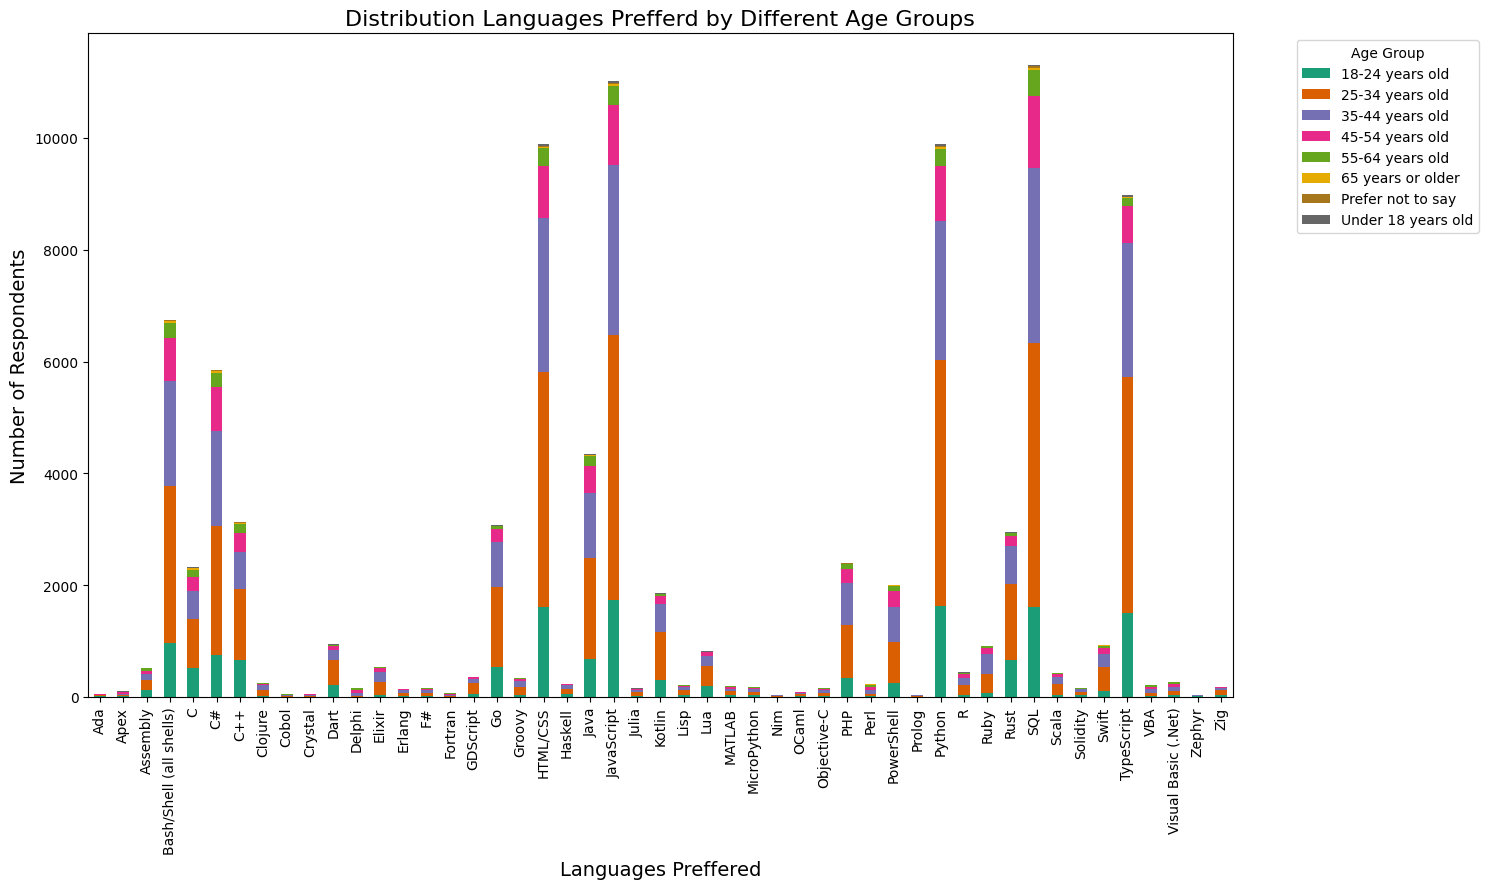

In [110]:
fig, ax = plt.subplots(figsize=(15, 9))
crosstab.plot(kind = 'bar', stacked=True, colormap='Dark2', ax=ax)
plt.title('Distribution Languages Prefferd by Different Age Groups', fontsize=16)
plt.xlabel('Languages Preffered', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [115]:
##Write your code here
df = df.dropna(subset=['Employment', 'PlatformAdmired'])

# Split both columns
df['Employment'] = df['Employment'].str.split(';')
df['PlatformAdmired'] = df['PlatformAdmired'].str.split(';')

# Ensure both lists are the same length
df = df[df['Employment'].str.len() == df['PlatformAdmired'].str.len()]

# Explode both columns
df_exploded = df.explode(['Employment', 'PlatformAdmired'])

# Strip Whitespaces in both columns
df_exploded['PlatformAdmired'] = df_exploded['PlatformAdmired'].str.strip()
df_exploded['Employment'] = df_exploded['Employment'].str.strip()


In [116]:
# Create the crosstab
crosstab = pd.crosstab(df_exploded['PlatformAdmired'], df_exploded['Employment'])

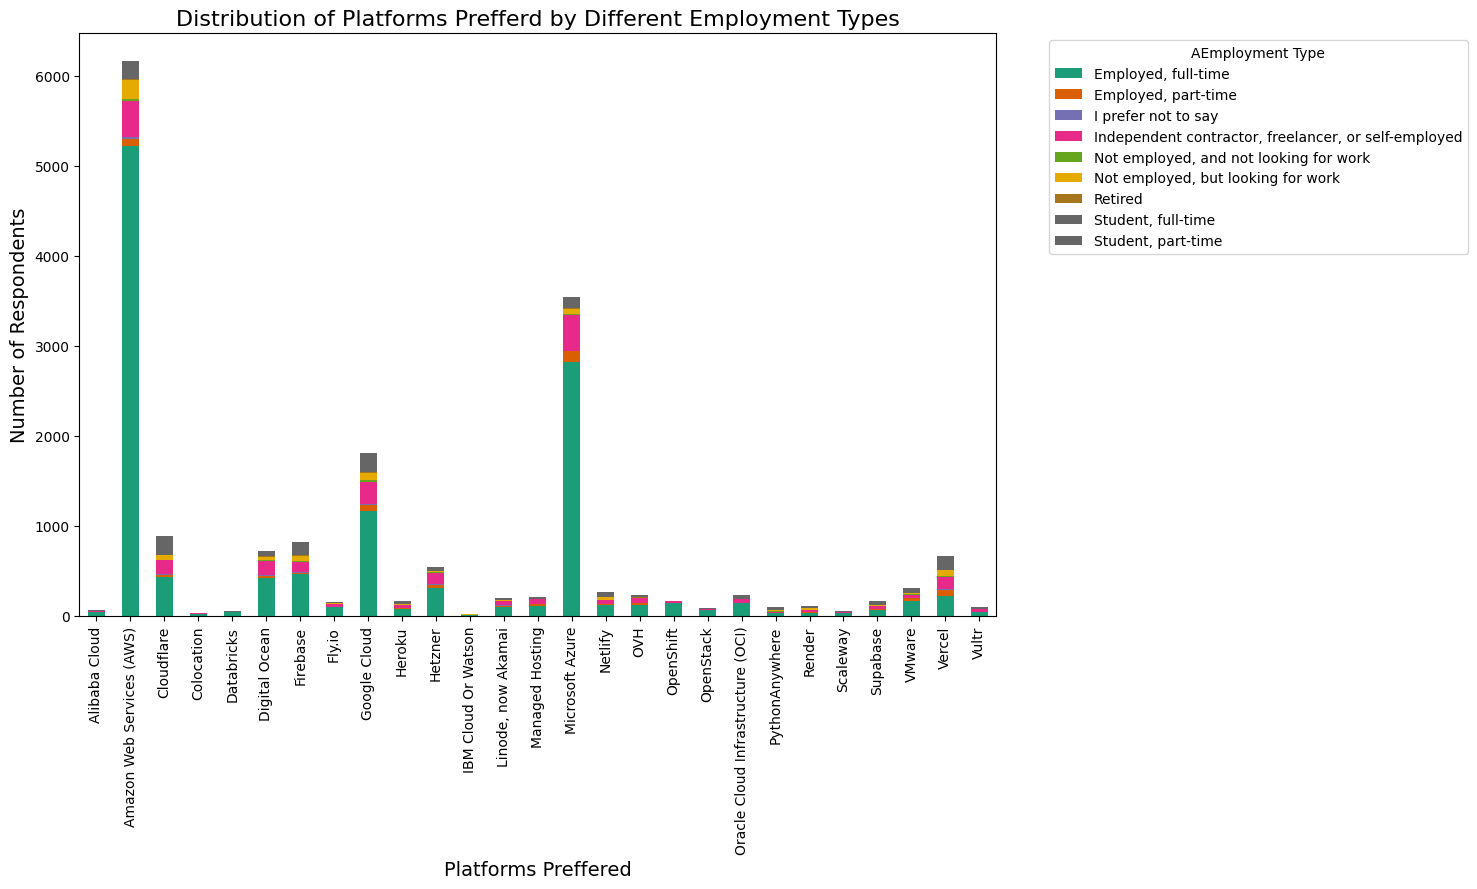

In [117]:
# plot
fig, ax = plt.subplots(figsize=(15, 9))
crosstab.plot(kind = 'bar', stacked=True, colormap='Dark2', ax=ax)
plt.title('Distribution of Platforms Prefferd by Different Employment Types', fontsize=16)
plt.xlabel('Platforms Preffered', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.legend(title='AEmployment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
